In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]


path = '/mnt/is2/alejandro/ornella/'

snap = h5py.File(path + 'outputs_1/snap_496.h5py', 'r')
    
for i in range(0,2):
    cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'][()]
    r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'][()]

    pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'][()]

    pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'][()]
    mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'][()]

    pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'][()]

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    mstr = mstr*1e10/h
    mgas = mgas*1e10/h
    mdrk = mdrk*1e10/h
    
#     hist(mdrk*1e10)
# #     hist(mgas)
# #     hist(mdrk)
#     print mdrk*1e10
    
    
    
#     mstr = mstr/h

    r200 = r200*aexp[0]/h
    rgal=0.15*r200
    
    print 'r200=', r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]  
    
    print 'r50=', r50


r200= 167.2103825136612
r50= 1.6463573
r200= 153.54234972677597
r50= 2.444692


/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


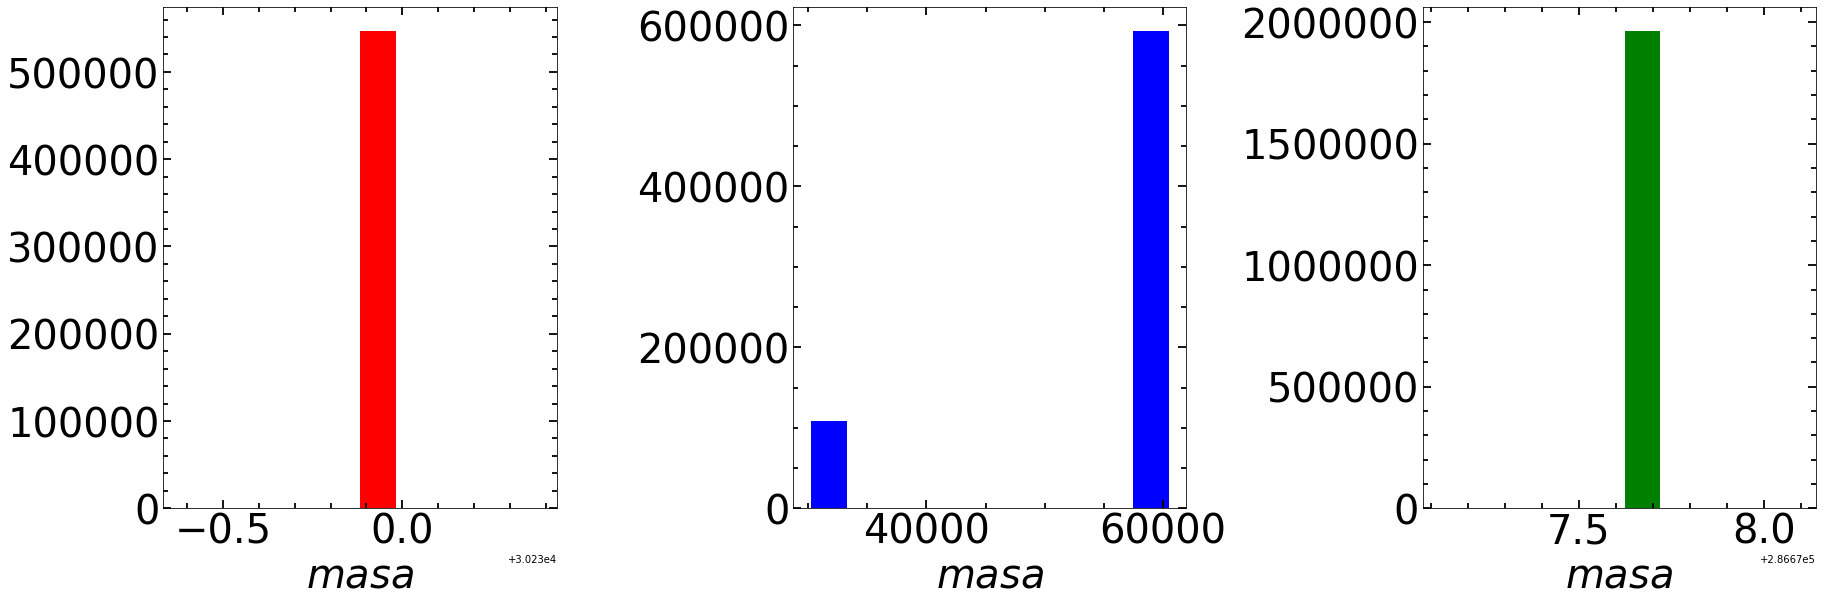

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.92, top = 0.95, wspace=0.6, hspace= 0)

ax[0].hist(mstr, color='r')
# ax.hist(mgas, alpha=0.5, bins=10)
# ax.hist(mdrk, alpha=0.5, bins=10)
# ax.set_ylim(0,500)
ax[0].set_xlabel(r'$masa$', fontsize=40)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=40)
ax[0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# ax.hist(mstr, alpha=0.5, bins=10)
ax[1].hist(mgas, color = 'b')
# ax.hist(mdrk, alpha=0.5, bins=10)
# ax.set_ylim(0,500)
ax[1].set_xlabel(r'$masa$', fontsize=40)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=40)
ax[1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# ax.hist(mstr, alpha=0.5, bins=10)
# ax.hist(mgas, alpha=0.5, bins=10)
ax[2].hist(mdrk, color ='g')
# ax.set_ylim(0,500)
ax[2].set_xlabel(r'$masa$', fontsize=40)
ax[2].minorticks_on()
ax[2].tick_params( labelsize=40)
ax[2].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[2].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
plt.show()

In [4]:
print(np.median(mstr))

30229.883


In [12]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snap = h5py.File(path + 'Gasoline/outputs2/snap_0112.h5py', 'r')

for i in range(0,1):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'][()]
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'][()]
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'][()]
    
    print('h=',h)
    
    omega_lambda = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaL0'][()]
    omega_matter = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaM0'][()]

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'][()]
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'][()]

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'][()]

    
#     hist(mstr)
#     plt.axvline(np.median(mstr))
# #     hist(mgas)
# #     hist(mdrk)

#     print mstr
#     print np.median(mstr)
    
    
    xstr = pstr[:,0]-cm[0]
    ystr = pstr[:,1]-cm[1]
    zstr = pstr[:,2]-cm[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

#     v_x = vel[:,0]
#     v_y = vel[:,1]
#     v_z = vel[:,2]

#----------------------masas----------------------------
#     r200 = r200*aexp
#     rgal=0.15*r200
    
#     print 'r200=', r200

#     limit = np.where(r<rgal)
#     r_sort = np.sort(r[limit])
#     r_indice = np.argsort(r[limit])

#     Mc_str = cumsum((mstr[limit])[r_indice])
#     M_gal = Mc_str[-1]

# #------------------ calculamos M90------------------------------------------
#     razon = Mc_str/M_gal
#     noventa, = np.where(razon < 0.9)
#     cincuenta, = np.where(razon < 0.5)

#     r90 = r_sort[noventa][-1]
#     r50 = r_sort[cincuenta][-1]
    
#     print 'r50=', r50

('h=', 0.730047845568037)


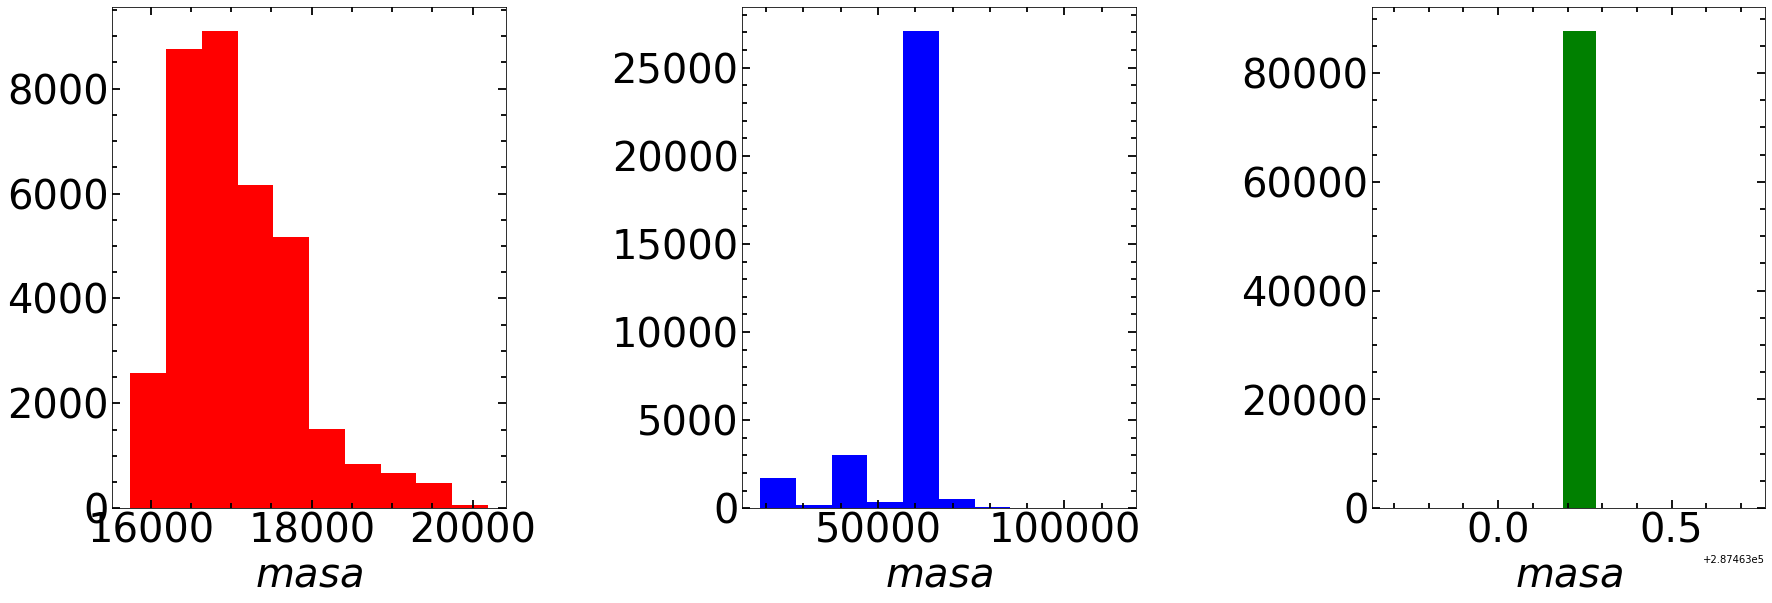

In [13]:


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.92, top = 0.95, wspace=0.6, hspace= 0)

ax[0].hist(mstr,  color='r')
# ax.hist(mgas, alpha=0.5, bins=10)
# ax.hist(mdrk, alpha=0.5, bins=10)
# ax.set_ylim(0,500)
ax[0].set_xlabel(r'$masa$', fontsize=40)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=40)
ax[0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# ax.hist(mstr, alpha=0.5, bins=10)
ax[1].hist(mgas, color = 'b')
# ax.hist(mdrk, alpha=0.5, bins=10)
# ax.set_ylim(0,500)
ax[1].set_xlabel(r'$masa$', fontsize=40)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=40)
ax[1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# ax.hist(mstr, alpha=0.5, bins=10)
# ax.hist(mgas, alpha=0.5, bins=10)
ax[2].hist(mdrk,  color ='g')
# ax.set_ylim(0,500)
ax[2].set_xlabel(r'$masa$', fontsize=40)
ax[2].minorticks_on()
ax[2].tick_params( labelsize=40)
ax[2].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[2].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
plt.show()

In [14]:
from scipy.stats import mode
print(mode(mstr))
print(mode(mgas))

ModeResult(mode=array([16297.583], dtype=float32), count=array([50]))
ModeResult(mode=array([60625.45], dtype=float32), count=array([15761]))


In [18]:
np.median(mgas)

60625.45

In [17]:
mgas.min()

18338.38

In [24]:
?np.median

Signature: np.median(a, axis=None, out=None, overwrite_input=False, keepdims=False)
Docstring:
Compute the median along the specified axis.

Returns the median of the array elements.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
axis : {int, sequence of int, None}, optional
    Axis or axes along which the medians are computed. The default
    is to compute the median along a flattened version of the array.
    A sequence of axes is supported since version 1.9.0.
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : bool, optional
   If True, then allow use of memory of input array `a` for
   calculations. The input array will be modified by the call to
   `median`. This will save memory when you do not need to preserve
   the contents of the input array. 